# 0.Librerías

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.express as px

from sklearn.preprocessing import StandardScaler 
import hdbscan
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans

from sklearn.metrics import silhouette_score, silhouette_samples
from yellowbrick.cluster import SilhouetteVisualizer
from yellowbrick.cluster import KElbowVisualizer

# 1. Clustering por producto

In [2]:
df = pd.read_csv(r"C:\Users\alici\Documents\master_data_science\proyecto_nuclio\TFM\datos_arreglados.csv", index_col=0)
df["date"] = pd.to_datetime(df["date"])
df = df.set_index("date")

df.head()

,item,category,department,stores,region,week,year,is_holidays,units_sold,sell_price,total_sales
date,,,,,,,,,,,
2013-07-08,ACCESORIES_1_001,ACCESORIES,ACCESORIES_1,South_End(BOS_1),Boston,28,2013,0,0,12.7414,0.0000
2013-07-15,ACCESORIES_1_001,ACCESORIES,ACCESORIES_1,South_End(BOS_1),Boston,28,2013,1,0,12.7414,0.0000
2013-07-22,ACCESORIES_1_001,ACCESORIES,ACCESORIES_1,South_End(BOS_1),Boston,29,2013,0,4,10.9858,43.9432
2013-07-29,ACCESORIES_1_001,ACCESORIES,ACCESORIES_1,South_End(BOS_1),Boston,30,2013,0,6,10.9858,65.9148
2013-08-05,ACCESORIES_1_001,ACCESORIES,ACCESORIES_1,South_End(BOS_1),Boston,31,2013,0,0,10.9858,0.0000


Con las variables que tenemos vamos a obtener el porcentaje de ventas por *quarter* y *region* de cada producto, el precio medio total por producto y la cantidad de unidades vendidas de cada uno.

In [3]:
# Filtramos el DataFrame para obtener solo los datos de la ciudad de Boston
df_boston = df[df['region'] == 'Boston'].copy()

# Creamos una columna 'quarter' a partir del índice 'date'
df_boston['quarter'] = df_boston.index.quarter 

# Calculamos los porcentajes de ventas por ítem para cada cuatrimestre
df_boston = pd.crosstab(df_boston['item'], df_boston['quarter'], values=df_boston['total_sales'], aggfunc='sum', normalize='index')

# Renombramos las columnas de los cuatrimestres
df_boston.columns = ['Boston_Q' + str(col) for col in df_boston.columns]

# El resultado df_boston es un DataFrame con los porcentajes normalizados por ítem y cuatrimestre
df_boston.reset_index(inplace=True)

# Mostramos el DataFrame resultante
df_boston

,item,Boston_Q1,Boston_Q2,Boston_Q3,Boston_Q4
0,ACCESORIES_1_001,0.258490,0.215622,0.231207,0.294681
1,ACCESORIES_1_002,0.202792,0.238109,0.254912,0.304187
2,ACCESORIES_1_003,0.254469,0.249112,0.300880,0.195539
3,ACCESORIES_1_004,0.256721,0.259417,0.235593,0.248269
4,ACCESORIES_1_005,0.209317,0.214718,0.267872,0.308094
...,...,...,...,...,...
3044,SUPERMARKET_3_823,0.289806,0.177665,0.216503,0.316026
3045,SUPERMARKET_3_824,0.222281,0.277452,0.319342,0.180925
3046,SUPERMARKET_3_825,0.326950,0.258387,0.230210,0.184453
3047,SUPERMARKET_3_826,0.267774,0.289019,0.237289,0.205918


In [4]:
# Filtramos el DataFrame para obtener solo los datos de la ciudad de New York
df_ny = df[df['region'] == 'New York'].copy()

# Creamos una columna 'quarter' a partir del índice 'date'
df_ny['quarter'] = df_ny.index.quarter 

# Calculamos los porcentajes de ventas por ítem para cada cuatrimestre
df_ny = pd.crosstab(df_ny['item'], df_ny['quarter'], values=df_ny['total_sales'], aggfunc='sum', normalize='index')

# Renombramos las columnas de los cuatrimestres
df_ny.columns = ['New_York_Q' + str(col) for col in df_ny.columns]

# El resultado df_ny es un DataFrame con los porcentajes normalizados por ítem y cuatrimestre
df_ny.reset_index(inplace=True)

# Mostramos el DataFrame resultante
df_ny

,item,New_York_Q1,New_York_Q2,New_York_Q3,New_York_Q4
0,ACCESORIES_1_001,0.290651,0.185303,0.232997,0.291048
1,ACCESORIES_1_002,0.169339,0.190386,0.265158,0.375117
2,ACCESORIES_1_003,0.290550,0.256700,0.191819,0.260931
3,ACCESORIES_1_004,0.265228,0.256632,0.229645,0.248495
4,ACCESORIES_1_005,0.236569,0.200389,0.269576,0.293466
...,...,...,...,...,...
3044,SUPERMARKET_3_823,0.279585,0.208005,0.270410,0.242001
3045,SUPERMARKET_3_824,0.219106,0.344857,0.232286,0.203751
3046,SUPERMARKET_3_825,0.275628,0.230843,0.293817,0.199712
3047,SUPERMARKET_3_826,0.247476,0.296081,0.255348,0.201095


In [5]:
# Filtramos el DataFrame para obtener solo los datos de la ciudad de Philadelphia
df_philadelphia = df[df['region'] == 'Philadelphia'].copy()

# Creamos una columna 'quarter' a partir del índice 'date'
df_philadelphia['quarter'] = df_philadelphia.index.quarter 

# Calculamos los porcentajes de ventas por ítem para cada cuatrimestre
df_philadelphia = pd.crosstab(df_philadelphia['item'], df_philadelphia['quarter'], values=df_philadelphia['total_sales'], aggfunc='sum', normalize='index')

# Renombramos las columnas de los cuatrimestres
df_philadelphia.columns = ['Philadelphia_Q' + str(col) for col in df_philadelphia.columns]

# El resultado df_philadelphia es un DataFrame con los porcentajes normalizados por ítem y cuatrimestre
df_philadelphia.reset_index(inplace=True)

# Mostramos el DataFrame resultante
df_philadelphia

,item,Philadelphia_Q1,Philadelphia_Q2,Philadelphia_Q3,Philadelphia_Q4
0,ACCESORIES_1_001,0.280930,0.204212,0.247872,0.266986
1,ACCESORIES_1_002,0.217307,0.173846,0.250679,0.358168
2,ACCESORIES_1_003,0.326288,0.265655,0.222862,0.185195
3,ACCESORIES_1_004,0.286508,0.265151,0.221110,0.227232
4,ACCESORIES_1_005,0.260617,0.192501,0.215559,0.331322
...,...,...,...,...,...
3044,SUPERMARKET_3_823,0.307594,0.198021,0.215576,0.278808
3045,SUPERMARKET_3_824,0.222398,0.321861,0.289589,0.166152
3046,SUPERMARKET_3_825,0.320260,0.251718,0.228474,0.199548
3047,SUPERMARKET_3_826,0.211521,0.293508,0.251753,0.243219


In [6]:
# Hacemos un merge entre df_boston y df_ny
df_merge = pd.merge(df_boston, df_ny, on='item', how='outer')

# Luego, hacemos un merge del resultado anterior con df_philadelphia
df_merge = pd.merge(df_merge, df_philadelphia, on='item', how='outer')

# Mostramos el DataFrame resultante
df_merge.head()

,item,Boston_Q1,Boston_Q2,Boston_Q3,Boston_Q4,New_York_Q1,New_York_Q2,New_York_Q3,New_York_Q4,Philadelphia_Q1,Philadelphia_Q2,Philadelphia_Q3,Philadelphia_Q4
0,ACCESORIES_1_001,0.258490,0.215622,0.231207,0.294681,0.290651,0.185303,0.232997,0.291048,0.280930,0.204212,0.247872,0.266986
1,ACCESORIES_1_002,0.202792,0.238109,0.254912,0.304187,0.169339,0.190386,0.265158,0.375117,0.217307,0.173846,0.250679,0.358168
2,ACCESORIES_1_003,0.254469,0.249112,0.300880,0.195539,0.290550,0.256700,0.191819,0.260931,0.326288,0.265655,0.222862,0.185195
3,ACCESORIES_1_004,0.256721,0.259417,0.235593,0.248269,0.265228,0.256632,0.229645,0.248495,0.286508,0.265151,0.221110,0.227232
4,ACCESORIES_1_005,0.209317,0.214718,0.267872,0.308094,0.236569,0.200389,0.269576,0.293466,0.260617,0.192501,0.215559,0.331322


In [7]:
# Calculamos el total de unidades vendidas por 'item'
total_sales_by_item = df.groupby('item')['units_sold'].sum().reset_index(name='total_units_sold')

# Calculamos el precio medio total por 'item'
average_price_by_item = df.groupby('item')['sell_price'].mean().reset_index(name='avg_sell_price')

# Realizamos un merge para agregar las ventas totales por 'item'
df_merge = pd.merge(df_merge, total_sales_by_item, on='item', how='left')

# Realizamos otro merge para agregar el precio medio total por 'item'
df_final_item_region = pd.merge(df_merge, average_price_by_item, on='item', how='left')

df_final_item_region.head()

,item,Boston_Q1,Boston_Q2,Boston_Q3,Boston_Q4,New_York_Q1,New_York_Q2,New_York_Q3,New_York_Q4,Philadelphia_Q1,Philadelphia_Q2,Philadelphia_Q3,Philadelphia_Q4,total_units_sold,avg_sell_price
0,ACCESORIES_1_001,0.258490,0.215622,0.231207,0.294681,0.290651,0.185303,0.232997,0.291048,0.280930,0.204212,0.247872,0.266986,4051,11.039091
1,ACCESORIES_1_002,0.202792,0.238109,0.254912,0.304187,0.169339,0.190386,0.265158,0.375117,0.217307,0.173846,0.250679,0.358168,5047,5.276618
2,ACCESORIES_1_003,0.254469,0.249112,0.300880,0.195539,0.290550,0.256700,0.191819,0.260931,0.326288,0.265655,0.222862,0.185195,1405,3.944072
3,ACCESORIES_1_004,0.256721,0.259417,0.235593,0.248269,0.265228,0.256632,0.229645,0.248495,0.286508,0.265151,0.221110,0.227232,38996,5.981629
4,ACCESORIES_1_005,0.209317,0.214718,0.267872,0.308094,0.236569,0.200389,0.269576,0.293466,0.260617,0.192501,0.215559,0.331322,14529,3.833931


/var/folders/h2/m__59kjn7y17pxmn41zlkfsm0000gn/T/ipykernel_67476/1120532068.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_final_item_region.corr(), annot=True, cmap="YlGnBu");


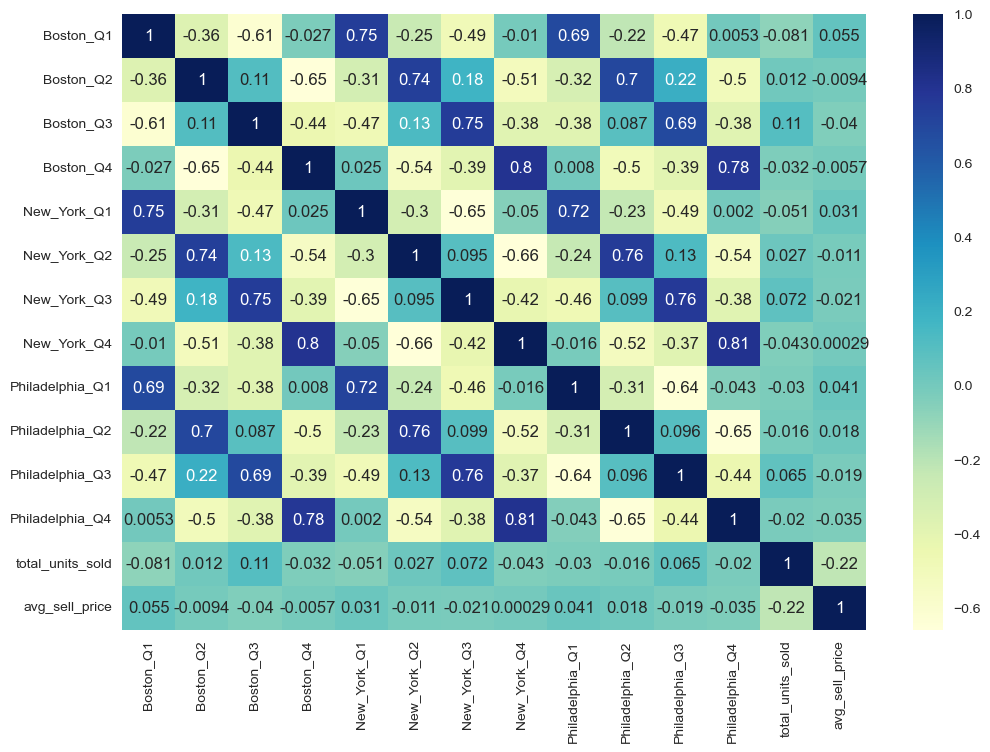

In [8]:
# Obtenemos la correlación de las diferentes variables
plt.figure(figsize=(12, 8))
sns.heatmap(df_final_item_region.corr(), annot=True, cmap="YlGnBu");

In [9]:
df_cluster_product_region= df_final_item_region.copy()

In [10]:
# Guardamos la variable 'ítem'
productos_region = df_cluster_product_region.pop('item')
productos_region

0        ACCESORIES_1_001
1        ACCESORIES_1_002
2        ACCESORIES_1_003
3        ACCESORIES_1_004
4        ACCESORIES_1_005
              ...        
3044    SUPERMARKET_3_823
3045    SUPERMARKET_3_824
3046    SUPERMARKET_3_825
3047    SUPERMARKET_3_826
3048    SUPERMARKET_3_827
Name: item, Length: 3049, dtype: object

In [11]:
# Estandarizamos las variables
ss = StandardScaler()
df_cluster_product_region_ss = pd.DataFrame(
    ss.fit_transform(df_cluster_product_region),
    columns= df_cluster_product_region.columns)
df_cluster_product_region_ss

,Boston_Q1,Boston_Q2,Boston_Q3,Boston_Q4,New_York_Q1,New_York_Q2,New_York_Q3,New_York_Q4,Philadelphia_Q1,Philadelphia_Q2,Philadelphia_Q3,Philadelphia_Q4,total_units_sold,avg_sell_price
0,-0.222054,-0.704803,-0.164482,0.972622,0.558720,-1.354499,-0.276860,0.896965,0.102832,-0.823106,0.200043,0.410154,-0.394344,1.206081
1,-1.279305,-0.268709,0.286179,1.135713,-1.852262,-1.245623,0.347982,2.424325,-1.069016,-1.429579,0.250008,1.943356,-0.371743,-0.063860
2,-0.298388,-0.055345,1.160120,-0.728219,0.556708,0.174859,-1.076884,0.349790,0.938264,0.404003,-0.245146,-0.965125,-0.454387,-0.357528
3,-0.255645,0.144504,-0.081098,0.176399,0.053451,0.173416,-0.341981,0.123847,0.205568,0.393936,-0.276342,-0.258293,0.398622,0.091511
4,-1.155453,-0.722332,0.532581,1.202726,-0.516113,-1.031358,0.433819,0.940884,-0.271296,-1.056991,-0.375139,1.491942,-0.156579,-0.381801
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3044,0.372363,-1.440872,-0.444037,1.338813,0.338780,-0.868220,0.450011,0.005874,0.593960,-0.946756,-0.374840,0.608947,-0.139311,-0.489608
3045,-0.909357,0.494247,1.511108,-0.978943,-0.863191,2.063254,-0.290667,-0.689061,-0.975244,1.526539,0.942617,-1.285335,-0.297586,-0.559770
3046,1.077427,0.124528,-0.183446,-0.918409,0.260145,-0.379010,0.904785,-0.762433,0.827245,0.125655,-0.145255,-0.723783,-0.180723,-0.139359
3047,-0.045831,0.718560,-0.048850,-0.550171,-0.299362,1.018431,0.157392,-0.737304,-1.175588,0.960277,0.269115,0.010515,-0.211221,-0.888269


Probamos con HDBSCAN...

In [12]:
# Inicializamos el algoritmo HDBSCAN 
clusterer = hdbscan.HDBSCAN(min_samples=10, min_cluster_size=5)

# Ajustamos el modelo y predecimos las etiquetas de clúster
cluster_labels = clusterer.fit_predict(df_cluster_product_region_ss)

# Agregamos las etiquetas del clúster al DataFrame original
df_final_item_region['cluster_hdbscan'] = cluster_labels

df_final_item_region

,item,Boston_Q1,Boston_Q2,Boston_Q3,Boston_Q4,New_York_Q1,New_York_Q2,New_York_Q3,New_York_Q4,Philadelphia_Q1,Philadelphia_Q2,Philadelphia_Q3,Philadelphia_Q4,total_units_sold,avg_sell_price,cluster_hdbscan
0,ACCESORIES_1_001,0.258490,0.215622,0.231207,0.294681,0.290651,0.185303,0.232997,0.291048,0.280930,0.204212,0.247872,0.266986,4051,11.039091,0
1,ACCESORIES_1_002,0.202792,0.238109,0.254912,0.304187,0.169339,0.190386,0.265158,0.375117,0.217307,0.173846,0.250679,0.358168,5047,5.276618,-1
2,ACCESORIES_1_003,0.254469,0.249112,0.300880,0.195539,0.290550,0.256700,0.191819,0.260931,0.326288,0.265655,0.222862,0.185195,1405,3.944072,0
3,ACCESORIES_1_004,0.256721,0.259417,0.235593,0.248269,0.265228,0.256632,0.229645,0.248495,0.286508,0.265151,0.221110,0.227232,38996,5.981629,0
4,ACCESORIES_1_005,0.209317,0.214718,0.267872,0.308094,0.236569,0.200389,0.269576,0.293466,0.260617,0.192501,0.215559,0.331322,14529,3.833931,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3044,SUPERMARKET_3_823,0.289806,0.177665,0.216503,0.316026,0.279585,0.208005,0.270410,0.242001,0.307594,0.198021,0.215576,0.278808,15290,3.344748,0
3045,SUPERMARKET_3_824,0.222281,0.277452,0.319342,0.180925,0.219106,0.344857,0.232286,0.203751,0.222398,0.321861,0.289589,0.166152,8315,3.026382,0
3046,SUPERMARKET_3_825,0.326950,0.258387,0.230210,0.184453,0.275628,0.230843,0.293817,0.199712,0.320260,0.251718,0.228474,0.199548,13465,4.934034,0
3047,SUPERMARKET_3_826,0.267774,0.289019,0.237289,0.205918,0.247476,0.296081,0.255348,0.201095,0.211521,0.293508,0.251753,0.243219,12121,1.535787,0


In [13]:
df_final_item_region.cluster_hdbscan.value_counts()

 0    2424
-1     620
 1       5
Name: cluster_hdbscan, dtype: int64

Hacemos una segunda iteración con KMeans...

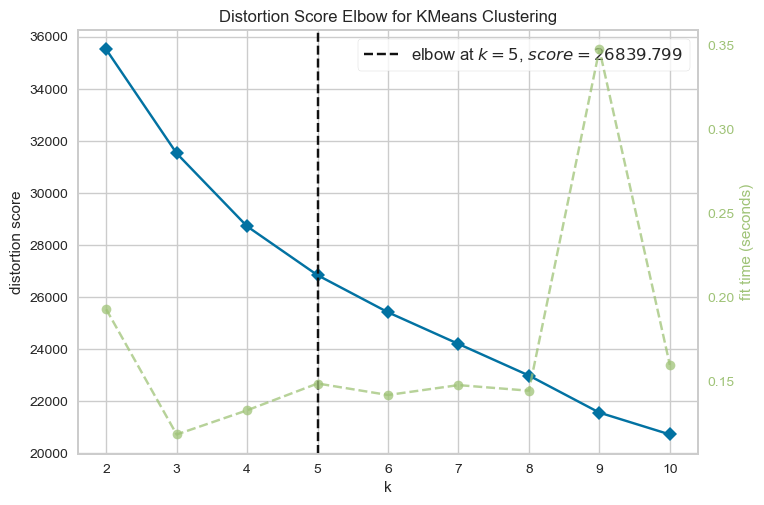

In [14]:
Elbow_M = KElbowVisualizer(KMeans(random_state=42, init="random", n_init="auto"), k=10)
Elbow_M.fit(df_cluster_product_region_ss)
Elbow_M.show();

In [15]:
silhouette_scores = []

for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=42, init="random", n_init="auto")
    kmeans.fit(df_cluster_product_region_ss)
    silhouette_scores.append(silhouette_score(df_cluster_product_region_ss, kmeans.labels_))

fig = px.line(
    x=range(2, 10),
    y=silhouette_scores,
    title="Silhouette score",
    labels={"x": "k", "y": "Silhouette score"},
)
fig.show()

In [16]:
kmeans= KMeans(n_clusters=3,random_state=42, init="random", n_init="auto")
kmeans.fit(df_cluster_product_region_ss)
df_final_item_region["cluster_kmeans"] = kmeans.labels_

/Users/santi/anaconda3/envs/Nuclio/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning:

X does not have valid feature names, but KMeans was fitted with feature names



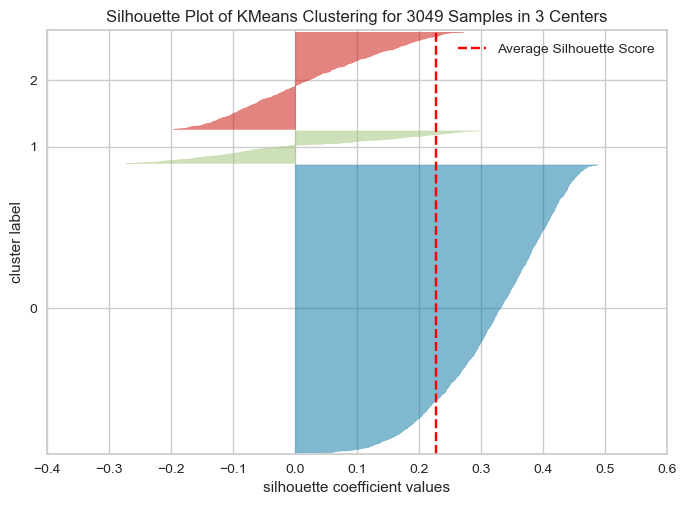

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 3049 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [17]:
visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick')
visualizer.fit(df_cluster_product_region_ss)  
visualizer.show()

In [18]:
df_final_item_region.head()

,item,Boston_Q1,Boston_Q2,Boston_Q3,Boston_Q4,New_York_Q1,New_York_Q2,New_York_Q3,New_York_Q4,Philadelphia_Q1,Philadelphia_Q2,Philadelphia_Q3,Philadelphia_Q4,total_units_sold,avg_sell_price,cluster_hdbscan,cluster_kmeans
0,ACCESORIES_1_001,0.258490,0.215622,0.231207,0.294681,0.290651,0.185303,0.232997,0.291048,0.280930,0.204212,0.247872,0.266986,4051,11.039091,0,2
1,ACCESORIES_1_002,0.202792,0.238109,0.254912,0.304187,0.169339,0.190386,0.265158,0.375117,0.217307,0.173846,0.250679,0.358168,5047,5.276618,-1,0
2,ACCESORIES_1_003,0.254469,0.249112,0.300880,0.195539,0.290550,0.256700,0.191819,0.260931,0.326288,0.265655,0.222862,0.185195,1405,3.944072,0,0
3,ACCESORIES_1_004,0.256721,0.259417,0.235593,0.248269,0.265228,0.256632,0.229645,0.248495,0.286508,0.265151,0.221110,0.227232,38996,5.981629,0,0
4,ACCESORIES_1_005,0.209317,0.214718,0.267872,0.308094,0.236569,0.200389,0.269576,0.293466,0.260617,0.192501,0.215559,0.331322,14529,3.833931,0,0


Con los datos obtenidos, decidimos quedarnos mejor con el porcentaje de ventas totales por *quarter* de cada producto, el precio medio total por producto y la cantidad de unidades vendidas de cada uno.

In [19]:
# Creamos un diccionario para mapear los nombres de las columnas
quarter_names = {1: 'Q1', 2: 'Q2', 3: 'Q3', 4: 'Q4'}

# Creamos una columna 'quarter' a partir del índice 'date' y aplicamos el mapeo
df['quarter'] = (df.index.month - 1) // 3 + 1
df['quarter'] = df['quarter'].map(quarter_names)

# Calculamos los porcentajes de ventas por ítem y cuatrimestre
df_perc_quarter_item = pd.crosstab(df['item'], df['quarter'], values=df['total_sales'], aggfunc='sum', normalize='index')

# Calculamos las unidades totales vendidas por ítem
units_total = df.groupby('item')['units_sold'].sum()

# Calculamos el precio medio por ítem
avg_price = df.groupby('item').apply(lambda x: (x['total_sales'].sum() / x['units_sold'].sum()))

# Convertimos las Series en DataFrames para unirlos más fácilmente después
units_total_by_item_df = units_total.reset_index(name='units_total')
average_price_by_item_df = avg_price.reset_index(name='avg_price')

# Unimos los DataFrames para tener todos los datos juntos
df_final = df_perc_quarter_item.reset_index()  
df_final = df_final.merge(units_total_by_item_df, on='item')
df_final = df_final.merge(average_price_by_item_df, on='item')

df_final.head()

,item,Q1,Q2,Q3,Q4,units_total,avg_price
0,ACCESORIES_1_001,0.281263,0.195372,0.234402,0.288963,4051,11.000712
1,ACCESORIES_1_002,0.199654,0.190240,0.255982,0.354124,5047,5.279317
2,ACCESORIES_1_003,0.289062,0.256714,0.227942,0.226282,1405,3.938599
3,ACCESORIES_1_004,0.266751,0.258757,0.229655,0.244836,38996,6.006287
4,ACCESORIES_1_005,0.234197,0.202624,0.257898,0.305281,14529,3.807422


/var/folders/h2/m__59kjn7y17pxmn41zlkfsm0000gn/T/ipykernel_67476/3438307196.py:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



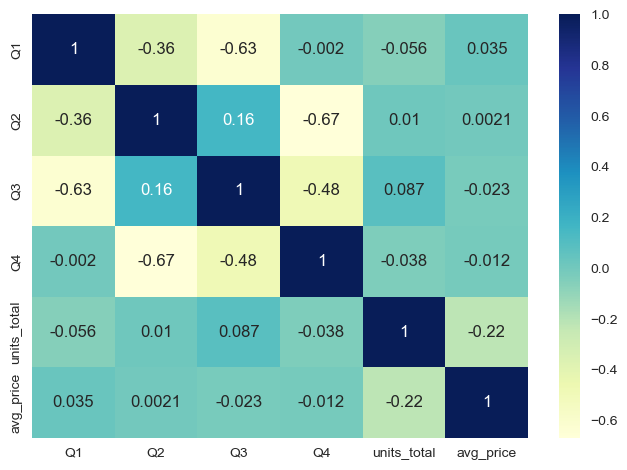

In [20]:
# Obtenemos la correlación de las diferentes variables
sns.heatmap(df_final.corr(), annot=True, cmap="YlGnBu");

Ya que ninguna variable tiene una alta correlación entre sí, no vamos a proceder a eliminar.

In [21]:
df_cluster_product= df_final.copy()

In [22]:
# Guardamos la variable 'ítem'
productos = df_cluster_product.pop('item')
productos

0        ACCESORIES_1_001
1        ACCESORIES_1_002
2        ACCESORIES_1_003
3        ACCESORIES_1_004
4        ACCESORIES_1_005
              ...        
3044    SUPERMARKET_3_823
3045    SUPERMARKET_3_824
3046    SUPERMARKET_3_825
3047    SUPERMARKET_3_826
3048    SUPERMARKET_3_827
Name: item, Length: 3049, dtype: object

In [23]:
# Cambiamos todos los nombres de las columnas a strings
df_cluster_product.columns = df_cluster_product.columns.astype(str)

# Estandarizamos las características
ss = StandardScaler()
df_cluster_product_ss = pd.DataFrame(
    ss.fit_transform(df_cluster_product),
    columns= df_cluster_product.columns)
df_cluster_product_ss

,Q1,Q2,Q3,Q4,units_total,avg_price
0,0.294480,-1.202115,-0.168496,0.907702,-0.394344,1.203613
1,-1.474984,-1.317252,0.285475,2.139800,-0.371743,-0.060003
2,0.463571,0.174213,-0.304391,-0.277493,-0.454387,-0.356112
3,-0.020167,0.220060,-0.268369,0.073347,0.398622,0.100554
4,-0.726012,-1.039404,0.325791,1.216253,-0.156579,-0.385083
...,...,...,...,...,...,...
3044,0.402209,-1.059728,0.210600,0.353026,-0.139311,-0.495808
3045,-1.021481,1.728044,0.451166,-0.970990,-0.297586,-0.551936
3046,0.737654,-0.110570,0.345690,-0.860815,-0.180723,-0.151334
3047,-0.540336,1.002684,0.157753,-0.515575,-0.211221,-0.886764


Probamos con HDBSCAN...

In [31]:
# Inicializamos el algoritmo HDBSCAN 
clusterer = hdbscan.HDBSCAN(min_samples=10, min_cluster_size=5)

# Ajustamos el modelo y predecimos las etiquetas de clúster
cluster_labels = clusterer.fit_predict(df_cluster_product_ss)

pd.Series(cluster_labels).value_counts()



 1    2307
-1     737
 0       5
dtype: int64

Hacemos unas segunda iteración con KMeans...

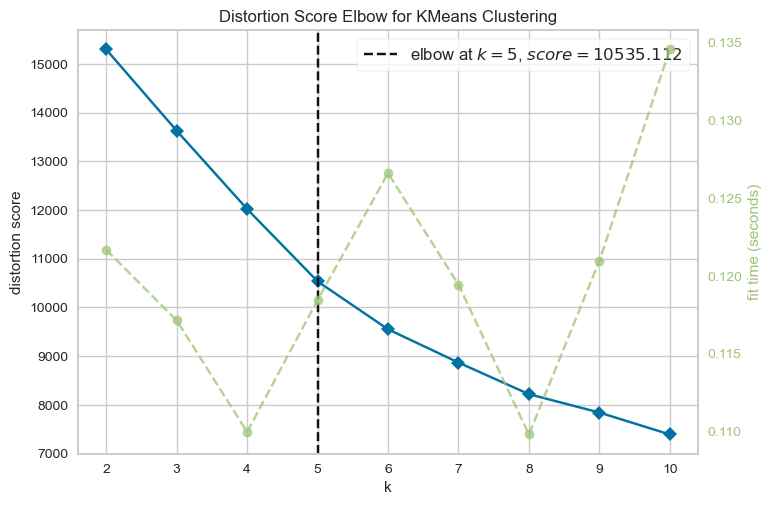

In [32]:
Elbow_M = KElbowVisualizer(KMeans(random_state=42, init="random", n_init="auto"), k=10)
Elbow_M.fit(df_cluster_product_ss)
Elbow_M.show();

In [33]:
silhouette_scores = []

for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=42, init="random", n_init="auto")
    kmeans.fit(df_cluster_product_ss)
    silhouette_scores.append(silhouette_score(df_cluster_product_ss, kmeans.labels_))

fig = px.line(
    x=range(2, 10),
    y=silhouette_scores,
    title="Silhouette score",
    labels={"x": "k", "y": "Silhouette score"},
)
fig.show()

In [34]:
kmeans= KMeans(n_clusters=5,random_state=42, init="random", n_init="auto")
kmeans.fit(df_cluster_product_ss)
df_final["cluster_kmeans"] = kmeans.labels_

/Users/santi/anaconda3/envs/Nuclio/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning:

X does not have valid feature names, but KMeans was fitted with feature names



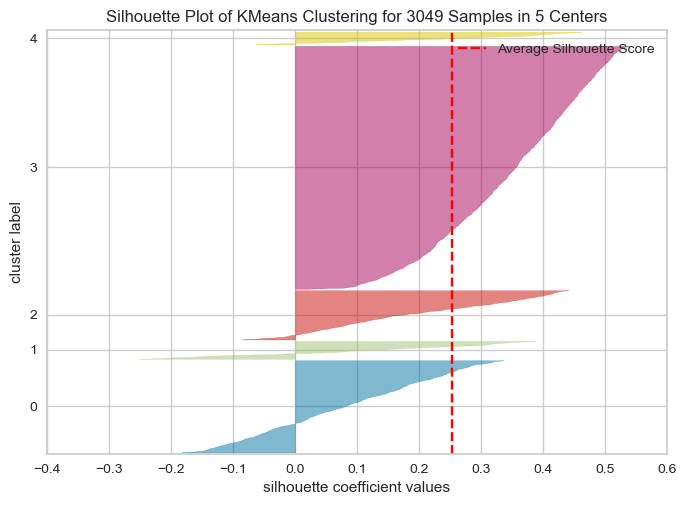

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 3049 Samples in 5 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [35]:
visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick')
visualizer.fit(df_cluster_product_ss)  
visualizer.show()

In [36]:
df_final.head()

,item,Q1,Q2,Q3,Q4,units_total,avg_price,cluster_kmeans
0,ACCESORIES_1_001,0.281263,0.195372,0.234402,0.288963,4051,11.000712,2
1,ACCESORIES_1_002,0.199654,0.190240,0.255982,0.354124,5047,5.279317,3
2,ACCESORIES_1_003,0.289062,0.256714,0.227942,0.226282,1405,3.938599,3
3,ACCESORIES_1_004,0.266751,0.258757,0.229655,0.244836,38996,6.006287,3
4,ACCESORIES_1_005,0.234197,0.202624,0.257898,0.305281,14529,3.807422,3


In [37]:
df_centroides= pd.DataFrame(kmeans.cluster_centers_,columns=kmeans.feature_names_in_)
df_centroides['Centroide'] = ['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4', 'Cluster 5']
df_centroides.set_index('Centroide', inplace=True)
df_centroides

,Q1,Q2,Q3,Q4,units_total,avg_price
Centroide,,,,,,
Cluster 1,0.849733,-0.676020,-1.043919,0.766960,-0.197905,-0.179532
Cluster 2,-1.558912,2.365782,1.800787,-2.252805,-0.171767,0.121676
Cluster 3,0.076144,-0.027137,-0.018194,-0.027181,-0.301642,2.058300
Cluster 4,-0.208445,0.084962,0.241595,-0.106969,-0.064653,-0.314259
Cluster 5,-0.267998,0.038667,0.474571,-0.225421,4.055215,-0.840264


In [38]:
df_centroides= pd.DataFrame(
    ss.inverse_transform(df_centroides),
    columns= df_cluster_product.columns)

df_centroides


,Q1,Q2,Q3,Q4,units_total,avg_price
0,0.306872,0.218820,0.192789,0.281519,12707.805022,4.738117
1,0.195783,0.354391,0.328012,0.121814,13859.666667,6.101925
2,0.271193,0.247740,0.241547,0.239520,8136.273481,14.870561
3,0.258068,0.252736,0.253896,0.235300,18580.071188,4.128101
4,0.255321,0.250673,0.264970,0.229036,200137.372340,1.746458


Tras visualizar los diferentes gráficos, sacamos las siguientes conclusiones:
### **Cluster 0:**
- Variabilidad considerable en las ventas entre el cuatrimestre 1 y el cuatrimestre 2. En promedio, este cluster tiene un ligero aumento en las ventas del cuatrimestre 1 en comparación con el cuatrimestre 2.
- Ocurre de nuevo lo mismo entre que cuatrimestre 3 y 4. Aumentando las ventas en el 4.
- Productos sin grandes fluctuaciones en el precio de venta y unidades vendidas.

### **Cluster 1:**
- Los datos están en un rango que va de menos ventas en el cuatrimestre 1 a ventas algo equilibradas en el cuatrimestre 2 (aunque también incluyen ítems con menos ventas en el cuatrimestre 2).
- Menor porcentaje de ventas en el cuatrimestre 4 con respecto al 3, que son más moderadas.
- Ventas y precio moderado.

### **Cluster 2:**
- Poca variabilidad en las ventas entre el cuatrimestre 1 y 2.
- Ventas de nuevo bastante equilibradas en ambos cuatrimestres (3 y 4)
- Productos con un precio medio elevado y un bajo número de ventas. Sería recomendable analizar este cluster puesto que podría indicar problemas de visibilidad en el mercado o problemas de distribución y accesibilidad de estos productos para los clientes.

### **Cluster 3:**
- Los ítems en este cluster tienen un comportamiento de ventas moderado y equilibrado entre los cuatrimestres 1 y 2. No varían mucho.
- Menor número de ventas en el cuatrimestre 3 que en el 4, siendo aún así bastante equilibradas.
- Equilibrio en el número de ventas y precio de los productos.

### **Cluster 4:**
- Alta variabilidad en las ventas entre los dos cuatrimestres.  Las ventas disminuyeron en el cuatrimestre 1 y aumentaron en el cuatrimestre 2.
- Continúa la alta variabilidad en el cuatrimestre 3 y 4, siendo mayores en el 3 que en el 4.
- Ventas y precio regular. Pueden considerarse productos esenciales.

### **Cluster 5:**
- Los datos se encuentran en un rango que indica cierta consistencia en las ventas entre los cuatrimestres 1 y 2.
- Siguen siendo productos consistentes en los 2 posteriores cuatrimestres.
- El cluster 5 es el que mayor porcentaje de ventas tiene en comparación con los productos del resto; pero también el precio de estos es inferior.

Vamos a proceder a visualizar los centroides comparando todas las variables de *df_cluster_product_ss.* *Q1* y *Q2* por un lado, *Q3* y *Q4* por otro, y *units_total* con *avg_price* en una última gráfica.

/var/folders/h2/m__59kjn7y17pxmn41zlkfsm0000gn/T/ipykernel_67476/26314556.py:10: UserWarning:

No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored



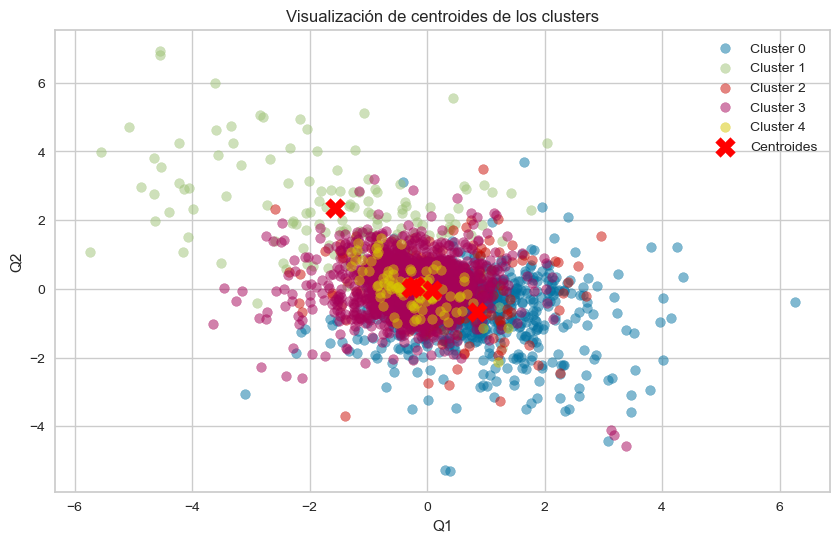

In [41]:
centroids = kmeans.cluster_centers_
labels = kmeans.labels_

# Ahora, graficamos los puntos de datos y los centroides
plt.figure(figsize=(10, 6))

# Graficamos los puntos de datos de las variables Q1 y Q2
# Aquí asignamos una etiqueta a cada cluster para la leyenda
for i in range(kmeans.n_clusters):
    plt.scatter(df_cluster_product_ss.iloc[labels == i, 0], 
                df_cluster_product_ss.iloc[labels == i, 1], 
                label=f'Cluster {i}', 
                cmap='viridis', 
                marker='o', 
                alpha=0.5)

# Graficamos los centroides
plt.scatter(centroids[:, 0], 
            centroids[:, 1], 
            c='red', marker='X', 
            s=200, 
            label='Centroides')

plt.title('Visualización de centroides de los clusters')
plt.xlabel(df_cluster_product_ss.columns[0]) 
plt.ylabel(df_cluster_product_ss.columns[1])

# Agregamos la leyenda al gráfico
plt.legend()

# Mostramos el gráfico
plt.show()

/var/folders/h2/m__59kjn7y17pxmn41zlkfsm0000gn/T/ipykernel_67476/42109138.py:11: UserWarning:

No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored



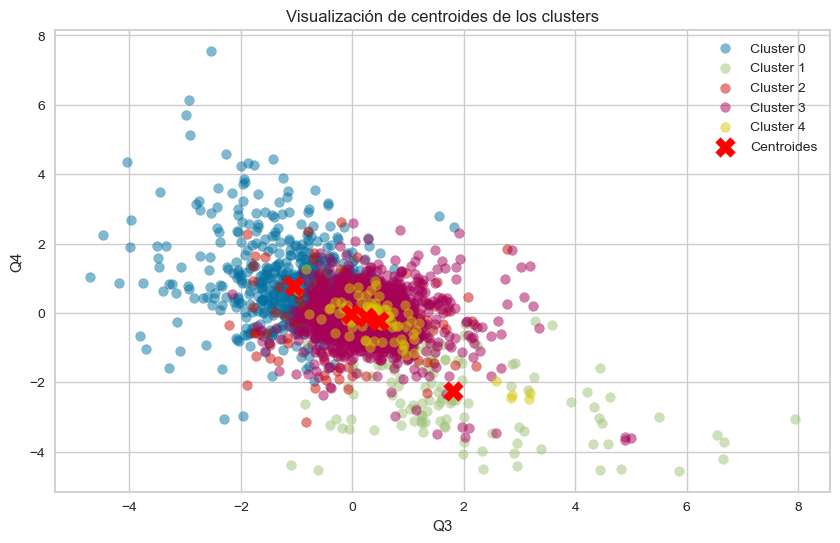

In [42]:
# Obtenemos las coordenadas de los centroides y las etiquetas de cluster
centroids = kmeans.cluster_centers_
labels = kmeans.labels_

# Ahora, graficamos los puntos de datos y los centroides
plt.figure(figsize=(10, 6))

# Graficamos los puntos de datos de las variables Q3 y Q4
# Aquí asignamos una etiqueta a cada cluster para la leyenda
for i in range(kmeans.n_clusters):
    plt.scatter(
        df_cluster_product_ss.iloc[labels == i, 2],  
        df_cluster_product_ss.iloc[labels == i, 3],  
        label=f'Cluster {i}',
        cmap='viridis',
        marker='o',
        alpha=0.5
    )

# Graficamos los centroides
plt.scatter(
    centroids[:, 2],  
    centroids[:, 3],  
    c='red',
    marker='X',
    s=200,
    label='Centroides'
)

plt.title('Visualización de centroides de los clusters')
plt.xlabel(df_cluster_product_ss.columns[2])  
plt.ylabel(df_cluster_product_ss.columns[3])  

# Agregamos la leyenda al gráfico
plt.legend()

# Mostramos el gráfico
plt.show()

/var/folders/h2/m__59kjn7y17pxmn41zlkfsm0000gn/T/ipykernel_67476/1412000448.py:11: UserWarning:

No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored



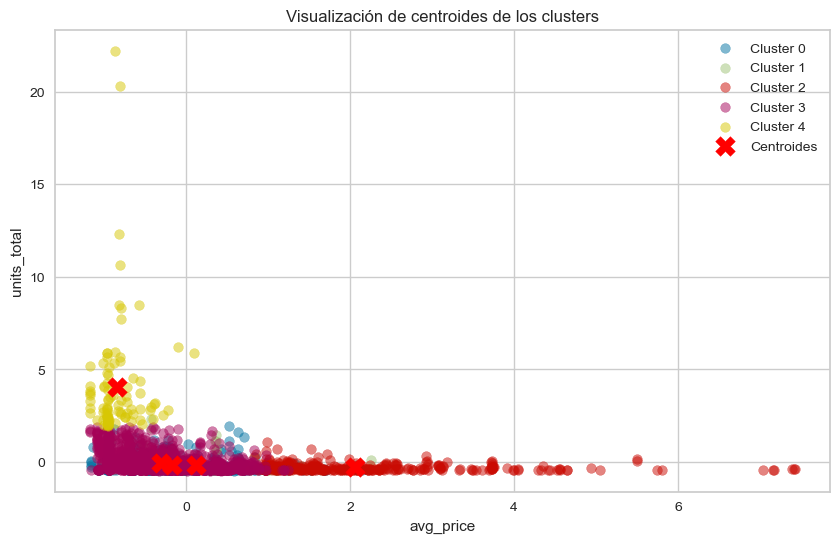

In [43]:
# Obtenemos las coordenadas de los centroides y las etiquetas de cluster
centroids = kmeans.cluster_centers_
labels = kmeans.labels_

# Ahora, graficamos los puntos de datos y los centroides
plt.figure(figsize=(10, 6))

# Graficamos los puntos de datos de las variables Q3 y Q4
# Aquí asignamos una etiqueta a cada cluster para la leyenda
for i in range(kmeans.n_clusters):
    plt.scatter(
        df_cluster_product_ss.iloc[labels == i, 5],  
        df_cluster_product_ss.iloc[labels == i, 4],  
        label=f'Cluster {i}',
        cmap='viridis',
        marker='o',
        alpha=0.5
    )

# Graficamos los centroides
plt.scatter(
    centroids[:, 5],  
    centroids[:, 4],  
    c='red',
    marker='X',
    s=200,
    label='Centroides'
)

plt.title('Visualización de centroides de los clusters')
plt.xlabel(df_cluster_product_ss.columns[5])  
plt.ylabel(df_cluster_product_ss.columns[4])  

# Agregamos la leyenda al gráfico
plt.legend()

# Mostramos el gráfico
plt.show()

In [44]:
df_final.to_csv("clusteringproducto.csv")